# Analysis of Motor Vehicle Thefts in Chicago

The data about motor vehicle thefts in chicago are taken from the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/motor-vehicle-theft/7ac4-d9tk)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mvt = pd.read_csv('../../data/mvt2015_2017.csv')

# Exercise 0
Inspect the mvt-data (columns, colum-types, first rows...)

In [3]:
mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27119 entries, 0 to 27118
Data columns (total 9 columns):
Date                    27119 non-null object
Block                   27119 non-null object
Primary Type            27119 non-null object
Description             27119 non-null object
Location Description    27119 non-null object
Ward                    27119 non-null float64
Community Area          27119 non-null float64
Year                    27119 non-null int64
Location                26564 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


In [4]:
mvt.head()

,Date,Block,Primary Type,Description,Location Description,Ward,Community Area,Year,Location
0,05/03/2016 08:00:00 PM,100XX S SANGAMON ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,34.0,73.0,2016,"(41.711843569, -87.646607932)"
1,05/03/2016 11:00:00 PM,084XX S MORGAN ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,21.0,71.0,2016,"(41.740895923, -87.648617881)"
2,05/03/2016 04:45:00 PM,003XX W MONROE ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,2.0,32.0,2016,"(41.88063228, -87.635935494)"
3,05/03/2016 07:00:00 PM,059XX S MOZART ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16.0,66.0,2016,"(41.785913194, -87.694801653)"
4,05/03/2016 09:00:00 PM,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,29.0,19.0,2016,"(41.933825894, -87.78335189)"


# Exercise 1
Draw a histogram to investigate, which locations (`Location Description`) are the **top 10**  theft hot spots horizontally.

# Exercise 1.1 - use `Dataframe/Series.plot`

Note:<br>
`DataFrame.plot.hist()` can only work with numerical x-values. If you don't want to convert the 'Location Descriptions' to a numeric value, you may want to use [`Series.value_counts().plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) instead.

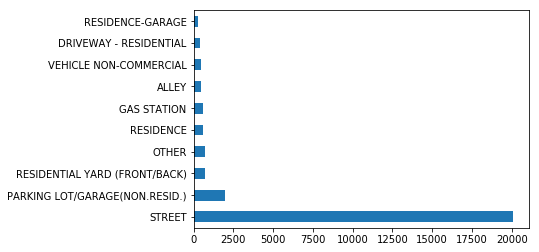

In [5]:
mvt['Location Description'].value_counts()[:10].plot(kind='barh');

# Exercise 1.2 - use `seaborn`

Install seaborn:
```bash
conda install seaborn
```

Use the [Countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) to show the frequencies of thefts at the single locations.

Plot the top 10 hot spots horizontally.

See also [Plotting with categorical data](http://seaborn.pydata.org/tutorial/categorical.html) for further information about how to show categorical data with `seaborn`.

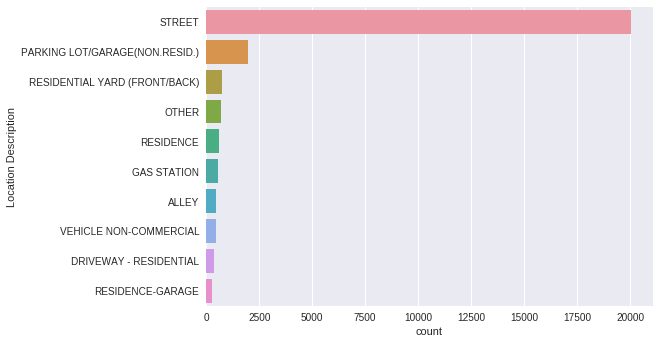

In [6]:
import seaborn as sns
sns.countplot(y='Location Description', data=mvt, order=mvt['Location Description'].value_counts().iloc[:10].index);

# order cuts to the top10 -> nasty as well

# Exercise 2
Investigate, at which weekdays/which hour the most thefts happen.

# Exercise 2.1

1. Convert `Date` to `pandas.DateTime`,
2. set `Date` as index and
3. add a further column `Weekday` (which is the weekday of `Date`), which is an ordered category (`['Monday' , 'Tuesday'...`).<br> 
Check 
  - the [Pandas Docs](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
  - and the [Advanced Pandas Primer](../2/4-ADVANCED-Primer-Idiomatic%20Pandas.ipynb)
on how to convert to an ordered category.

**Note:**<br>
Defining the weekday as *categorical* is required to get the plots in the further exercises ordered by weekday.

In [7]:
mvt['Date'] = pd.to_datetime(mvt.Date)

In [8]:
# If 'Date' were not index, we would have to use: mvt['Weekday'] = mvt.Date.dt.weekday_name
mvt.set_index('Date', inplace=True)

In [9]:
mvt['Weekday'] = mvt.index.weekday_name
mvt['Weekday'] = mvt['Weekday'].astype('category',
                             categories=['Monday' , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                             ordered=True)

In [10]:
mvt.head()

,Block,Primary Type,Description,Location Description,Ward,Community Area,Year,Location,Weekday
Date,,,,,,,,,
2016-05-03 20:00:00,100XX S SANGAMON ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,34.0,73.0,2016,"(41.711843569, -87.646607932)",Tuesday
2016-05-03 23:00:00,084XX S MORGAN ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,21.0,71.0,2016,"(41.740895923, -87.648617881)",Tuesday
2016-05-03 16:45:00,003XX W MONROE ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,2.0,32.0,2016,"(41.88063228, -87.635935494)",Tuesday
2016-05-03 19:00:00,059XX S MOZART ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16.0,66.0,2016,"(41.785913194, -87.694801653)",Tuesday
2016-05-03 21:00:00,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,29.0,19.0,2016,"(41.933825894, -87.78335189)",Tuesday


## Exercise 2.2

Count the thefts by weekday and<br>
make a corresponding histogram (barchart)

At which weekday happen the most thefts?

In [11]:
thefts_by_weekday = mvt.groupby('Weekday').size()

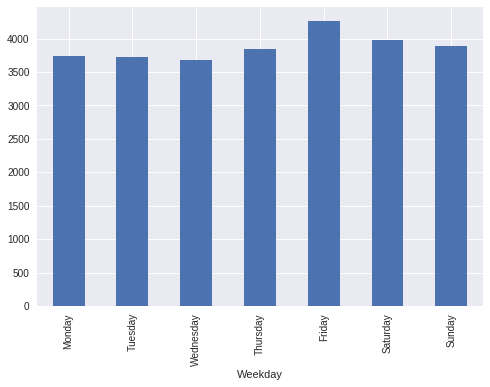

In [12]:
thefts_by_weekday.plot.bar();

## Exercise 2.3

- Add a further column `Hour` (which is the hour of `Date`) to the `mvt`-dataframe.
- make a line-plot - 1 line per weekday - of number of thefts (y-axis) over the Hours (x-axis)

**Note**<br>
To be able to plot without looping, you may want to
1. `groupby(['Weekday','Hour'])` and aggregate `size`
2. `reset_index` of the aggregate and `pivot` or `unstack`, so that `index` are the 24 `Hour`s, the `column`s are the `Weekday`s and the `values` are the counts.
Please check the 
  - [Pandas pivot Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) on how `pivot` works or
  - [Pandas unstack Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack) on how `unstack` works.

In [13]:
mvt['Hour'] = mvt.index.hour
mvt.head()

,Block,Primary Type,Description,Location Description,Ward,Community Area,Year,Location,Weekday,Hour
Date,,,,,,,,,,
2016-05-03 20:00:00,100XX S SANGAMON ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,34.0,73.0,2016,"(41.711843569, -87.646607932)",Tuesday,20
2016-05-03 23:00:00,084XX S MORGAN ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,21.0,71.0,2016,"(41.740895923, -87.648617881)",Tuesday,23
2016-05-03 16:45:00,003XX W MONROE ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,2.0,32.0,2016,"(41.88063228, -87.635935494)",Tuesday,16
2016-05-03 19:00:00,059XX S MOZART ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,16.0,66.0,2016,"(41.785913194, -87.694801653)",Tuesday,19
2016-05-03 21:00:00,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,29.0,19.0,2016,"(41.933825894, -87.78335189)",Tuesday,21


In [14]:
cnt_weekday_over_hours = (mvt.groupby(['Weekday','Hour']).size()
    .reset_index()
    .pivot('Hour','Weekday',0))
cnt_weekday_over_hours.head()

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,177,185,136,153,185,212,234
1,107,98,83,104,109,155,156
2,79,51,77,71,82,122,149
3,77,72,54,60,69,97,120
4,45,67,66,69,56,90,88


In [15]:
# Alternative
cnt_weekday_over_hours = (mvt.groupby(['Weekday','Hour']).size().unstack(level=0))
cnt_weekday_over_hours.head()

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,177,185,136,153,185,212,234
1,107,98,83,104,109,155,156
2,79,51,77,71,82,122,149
3,77,72,54,60,69,97,120
4,45,67,66,69,56,90,88


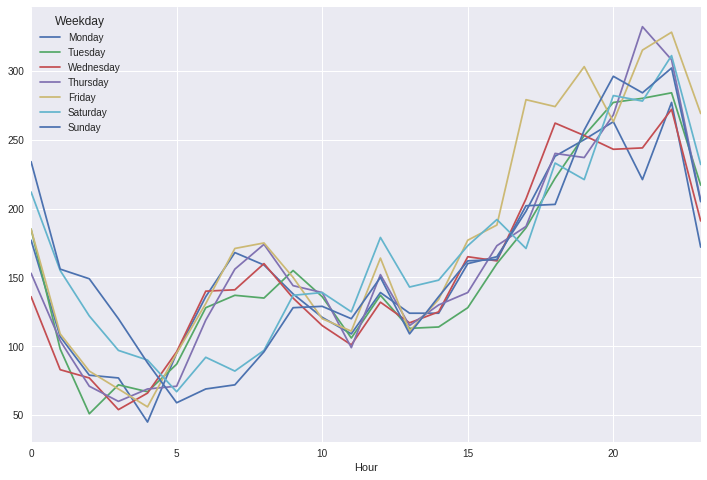

In [18]:
cnt_weekday_over_hours.plot(figsize=(12,8));

## Exercise 2.4
Draw a heatmap with [seaborn.heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html):<br>
x-axis=Hours, y-axis=Weekday, fill=count

At which weekday/time are the most thefts committed?

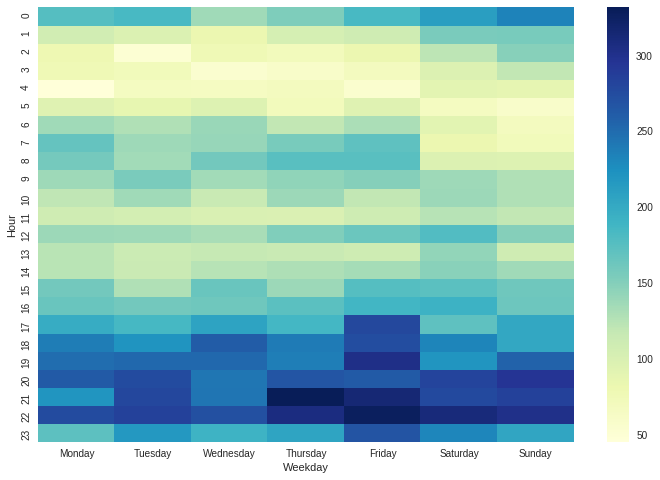

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(cnt_weekday_over_hours, cmap="YlGnBu");